Statistical Theory --- Final Project
---
**Fare-based Question Notebook**

By Adam Aharony and Adva Davidof.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from fitter import Fitter

In [2]:
# Reading dataset from csv
df = pd.read_csv("titanic.csv")
# Dropping unnecessary columns
df.drop(
    columns=[
        "PassengerId",
        "Name",
        "Ticket",
        "Cabin",
        "Embarked"
    ],
    inplace=True
)

# Desired data type for certain columns
types = {
    "Survived": "bool",
    "Pclass": "int8",
    "SibSp": "int8",
    "Parch": "int8",
}
for column, dtype in types.items():
    df[column] = df[column].astype(dtype)

# New 'additional family' feature
df["Family"] = df["SibSp"] + df["Parch"]

In [3]:
# Float precision variable, per column
DEFAULT_PRECISION = 2
COLOURS = {
    "blue": "#008AF3",
    "mid_blue": "#006AB2",
    "dark_blue": "#004676",
    "pink": "#FF027A",
    "red": "#B71C1C",
    "green": "#1B5E20"
}

rc = {
    "text.color": "black",
    "axes.labelcolor": "black",
    "legend.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
}

sns.set_theme(
    context="talk",
    style="whitegrid",
    palette="muted",
    rc=rc
)

## Statistical Tests

In [4]:
from scipy.stats import kstest, shapiro, ks_2samp, mannwhitneyu, ranksums, ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.api import Logit
from statsmodels.formula.api import logit
from statsmodels.genmod.generalized_estimating_equations import GEE
from scipy.stats import permutation_test


ALPHA = 5e-2
# Split into survivors and victims
fare_survivors = df.query("Survived == True")["Fare"]
fare_victims = df.query("Survived == False")["Fare"]

### Fitting Distributions using `Fitter`

In [5]:
def fit_distributions(data, description):
    data = data.copy().dropna()
    # Defining and fitting Fitter object
    f = Fitter(data)
    f.fit()
    # Filtering fitted distributions by p_value
    res = f.summary(Nbest=len(f.distributions), plot=False)
    res = res[res["ks_pvalue"] > ALPHA*0.8]
    res.sort_values("ks_pvalue", ascending=False, inplace=True)
    # Printing results
    print(f"Fit results for {description}:")
    print(res)
    return res


tasks = [
    (df["Fare"], "all fares paid"),
    (fare_survivors, "fares paid by survivors"),
    (fare_victims, "fares paid by victims")
]
results = []
for data, description in tasks:
    results.append(fit_distributions(data, description))
    print("")

2024-10-05 19:21:11.141 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted alpha distribution with error=0.019267)
2024-10-05 19:21:11.273 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-10-05 19:21:11.355 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=0.005768)
2024-10-05 19:21:11.469 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=0.001492)
2024-10-05 19:21:11.488 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.002131)
2024-10-05 19:21:11.561 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr12 distribution with error=0.000691)
2024-10-05 19:21:11.567 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted argus distribution with error=0.006329)
2024-10-05 19:21:11.585 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitt

Fit results for all fares paid:
Empty DataFrame
Columns: [sumsquare_error, aic, bic, kl_div, ks_statistic, ks_pvalue]
Index: []



2024-10-05 19:21:45.151 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted dgamma distribution with error=0.001717)
2024-10-05 19:21:45.162 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.001466)
2024-10-05 19:21:45.162 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted crystalball distribution with error=0.002487)
2024-10-05 19:21:45.169 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=0.001517)
2024-10-05 19:21:45.190 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi distribution with error=0.001967)
2024-10-05 19:21:45.207 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted exponnorm distribution with error=0.000944)
2024-10-05 19:21:45.234 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=0.000729)
2024-10-05 19:21:45.253 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted d

Fit results for fares paid by survivors:
             sumsquare_error          aic         bic  kl_div  ks_statistic  \
weibull_min         0.001849          inf         inf     inf      0.059867   
invgamma            0.000738  1648.268937  1659.77337     inf      0.074649   

             ks_pvalue  
weibull_min   0.165434  
invgamma      0.041983  



2024-10-05 19:22:17.984 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr12 distribution with error=0.003752)
2024-10-05 19:22:17.992 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=0.011825)
2024-10-05 19:22:18.036 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cosine distribution with error=0.016787)
2024-10-05 19:22:18.027 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted argus distribution with error=0.019207)
2024-10-05 19:22:18.041 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi distribution with error=0.013291)
2024-10-05 19:22:18.060 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.011018)
2024-10-05 19:22:18.063 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=0.006407)
2024-10-05 19:22:18.099 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted dgamma dis

Fit results for fares paid by victims:
Empty DataFrame
Columns: [sumsquare_error, aic, bic, kl_div, ks_statistic, ks_pvalue]
Index: []



2024-10-05 19:22:52.021 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted t distribution with error=0.004005)


In [6]:
results

[Empty DataFrame
 Columns: [sumsquare_error, aic, bic, kl_div, ks_statistic, ks_pvalue]
 Index: [],
              sumsquare_error          aic         bic  kl_div  ks_statistic  \
 weibull_min         0.001849          inf         inf     inf      0.059867   
 invgamma            0.000738  1648.268937  1659.77337     inf      0.074649   
 
              ks_pvalue  
 weibull_min   0.165434  
 invgamma      0.041983  ,
 Empty DataFrame
 Columns: [sumsquare_error, aic, bic, kl_div, ks_statistic, ks_pvalue]
 Index: []]

### KS-Test for Exponential Distribution

In [7]:
def EXP_KSTEST(data, description):
    data = data.copy()
    # Standardise data
    data -= data.min()
    data /= data.mean()
    # Perform the Kolmogorov-Smirnov test
    statistic, p_value = kstest(data, "expon")
    # Print results
    print(
        f"Exp-K-S test for {description}: "
        f"statistic={statistic:.{DEFAULT_PRECISION}f}, "
        f"p-value={p_value:.{DEFAULT_PRECISION}e}"
    )
    # Test interpretation
    if p_value < ALPHA:
        print(f"H_0 can be rejected for {description}.")
    else:
        print(f"H_0 cannot be rejected for {description}.")


tasks = [
    (df["Fare"], "all fares paid"),
    (fare_survivors, "fares paid by survivors"),
    (fare_victims, "fares paid by victims")
]

for data, description in tasks:
    EXP_KSTEST(data, description)
    print("")

Exp-K-S test for all fares paid: statistic=0.17, p-value=6.10e-22
H_0 can be rejected for all fares paid.

Exp-K-S test for fares paid by survivors: statistic=0.15, p-value=1.39e-07
H_0 can be rejected for fares paid by survivors.

Exp-K-S test for fares paid by victims: statistic=0.23, p-value=4.17e-25
H_0 can be rejected for fares paid by victims.



### Exponential Distribution of the Inverse of Fare

In [8]:
tasks = [
    (1 / df["Fare"][df["Fare"] > 0], "inverse of all fares paid"),
    (1 / fare_survivors[fare_survivors > 0], "inverse of fares paid by survivors"),
    (1 / fare_victims[fare_victims > 0], "inverse of fares paid by victims")
]

for data, description in tasks:
    EXP_KSTEST(data, description)
    print("")

Exp-K-S test for inverse of all fares paid: statistic=0.13, p-value=8.98e-14
H_0 can be rejected for inverse of all fares paid.

Exp-K-S test for inverse of fares paid by survivors: statistic=0.07, p-value=5.49e-02
H_0 cannot be rejected for inverse of fares paid by survivors.

Exp-K-S test for inverse of fares paid by victims: statistic=0.19, p-value=8.86e-17
H_0 can be rejected for inverse of fares paid by victims.



### Tests for Normality

#### Kolmogorov-Smirnov Test


In [9]:
def KSTEST(data, description):
    data = data.copy()
    # Standardise data
    data = (data - data.mean()) / data.std()
    # Perform the Kolmogorov-Smirnov test
    statistic, p_value = kstest(data, "norm")
    # Print results
    print(
        f"K-S test for {description}: "
        f"statistic={statistic:.{DEFAULT_PRECISION}f}, "
        f"p-value={p_value:.{DEFAULT_PRECISION}e}"
    )
    # Test interpretation
    if p_value < ALPHA:
        print(f"H_0 can be rejected for {description}.")
    else:
        print(f"H_0 cannot be rejected for {description}.")

    
tasks = [
    (df["Fare"], "all fares paid"),
    (fare_survivors, "fares paid by survivors"),
    (fare_victims, "fares paid by victims")
]

for data, description in tasks:
    KSTEST(data, description)
    print("")

K-S test for all fares paid: statistic=0.28, p-value=4.18e-63
H_0 can be rejected for all fares paid.

K-S test for fares paid by survivors: statistic=0.26, p-value=1.55e-21
H_0 can be rejected for fares paid by survivors.

K-S test for fares paid by victims: statistic=0.28, p-value=6.25e-38
H_0 can be rejected for fares paid by victims.



#### Shapiro-Wilk Test



In [10]:
def SWTEST(data, description):
    data = data.copy()
    # Perform the Shapiro-Wilk test
    statistic, p_value = shapiro(data)
    # Print results
    print(
        f"Shapiro-Wilk test for {description}: "
        f"statistic={statistic:.{DEFAULT_PRECISION}f}, "
        f"p-value={p_value:.{DEFAULT_PRECISION}e}"
    )
    # Test interpretation
    if p_value < ALPHA:
        print(f"H_0 can be rejected for {description}.")
    else:
        print(f"H_0 cannot be rejected for {description}.")


tasks = [
    (df["Fare"], "all fares paid"),
    (fare_survivors, "fares paid by survivors"),
    (fare_victims, "fares paid by victims")
]

for data, description in tasks:
    SWTEST(data, description)
    print("")

Shapiro-Wilk test for all fares paid: statistic=0.52, p-value=1.08e-43
H_0 can be rejected for all fares paid.

Shapiro-Wilk test for fares paid by survivors: statistic=0.60, p-value=1.83e-27
H_0 can be rejected for fares paid by survivors.

Shapiro-Wilk test for fares paid by victims: statistic=0.51, p-value=3.23e-36
H_0 can be rejected for fares paid by victims.



### Kolmogorov-Smirnov Two-Sample Test 

#### Two-Sided

In [11]:
# Perform the K-S two-sample test
statistic, p_value = ks_2samp(fare_survivors, fare_victims)

# Print results
print(f"Two-Sided K-S Statistic: {statistic:.{DEFAULT_PRECISION}f}")
print(f"Two-Sided p-value: {p_value:.{DEFAULT_PRECISION}e}")

# Test interpretation
if p_value < ALPHA:
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")

Two-Sided K-S Statistic: 0.30
Two-Sided p-value: 1.61e-17
H_0 can be rejected.


### Mann-Whitney U Test

#### Two-Sided

In [12]:
# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(fare_survivors, fare_victims)

# Print results
print(f"Two-Sided U statistic: {u_statistic:.{DEFAULT_PRECISION}f}")
print(f"Two-Sided P-value: {p_value:.{DEFAULT_PRECISION}e}")

# Test interpretation
if p_value < ALPHA:
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")

Two-Sided U statistic: 129951.50
Two-Sided P-value: 4.55e-22
H_0 can be rejected.


#### One-Sided

In [13]:
# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(fare_survivors, fare_victims, alternative="greater")

# Print results
print(f"One-Sided U statistic: {u_statistic:.{DEFAULT_PRECISION}f}")
print(f"One-Sided P-value: {p_value:.{DEFAULT_PRECISION}e}")

# Test interpretation
if p_value < ALPHA:
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")

One-Sided U statistic: 129951.50
One-Sided P-value: 2.28e-22
H_0 can be rejected.


### Wilcoxon Rank-Sum Test (with continuity correction)

#### Two-Sided

In [14]:
# Perform Wilcoxon rank-sum test
rank_statistic, p_value = ranksums(fare_survivors, fare_victims)

# Print results
print(f"Two-Sided Rank statistic: {rank_statistic:.{DEFAULT_PRECISION}f}")
print(f"Two-Sided P-value: {p_value:.{DEFAULT_PRECISION}e}")

# Test interpretation
if p_value < ALPHA:
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")

Two-Sided Rank statistic: 9.66
Two-Sided P-value: 4.65e-22
H_0 can be rejected.


#### One-Sided

In [15]:
# Perform Wilcoxon rank-sum test
rank_statistic, p_value = ranksums(fare_survivors, fare_victims, alternative="greater")

# Print results
print(f"One-Sided Rank statistic: {rank_statistic:.{DEFAULT_PRECISION}f}")
print(f"One-Sided P-value: {p_value:.{DEFAULT_PRECISION}e}")

# Test interpretation
if p_value < ALPHA:
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")

One-Sided Rank statistic: 9.66
One-Sided P-value: 2.32e-22
H_0 can be rejected.


### Logistic Regression as a Statistical Test


In [16]:
# Create and fit the logistic regression model
model = Logit(
    df["Survived"].copy(),
    df["Fare"].copy()
).fit()

# Print p-values
p_value = model.pvalues[0]
print(f"p-value: {p_value:.{DEFAULT_PRECISION}e}")

# Test interpretation
if np.all(p_value < ALPHA):
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")

model.summary()

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
p-value: 1.49e-02
H_0 can be rejected.


/tmp/ipykernel_28936/386875413.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[0]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      890
Method:                           MLE   Df Model:                            0
Date:                Sat, 05 Oct 2024   Pseudo R-squ.:                -0.03550
Time:                        19:22:52   Log-Likelihood:                -614.39
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Fare           0.0030      0.001      2.434      0.015       0.001       0.005
==============================================================================
"""

### Z-Test

#### Two-Sided

In [17]:
# Perform z-test
z_statistic, p_value = ztest(fare_survivors, fare_victims)

# Print results
print(f"Two-Sided Z-statistic: {z_statistic:.{DEFAULT_PRECISION}f}")
print(f"Two-Sided p-value: {p_value:.{DEFAULT_PRECISION}e}")

# Test interpretation
if p_value < ALPHA:
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")

Two-Sided Z-statistic: 7.94
Two-Sided p-value: 2.04e-15
H_0 can be rejected.


#### One-Sided

In [18]:
# Perform z-test
z_statistic, p_value = ztest(fare_survivors, fare_victims, alternative="larger")

# Print results
print(f"One-Sided Z-statistic: {z_statistic:.{DEFAULT_PRECISION}f}")
print(f"One-Sided p-value: {p_value:.{DEFAULT_PRECISION}e}")

# Test interpretation
if p_value < ALPHA:
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")

One-Sided Z-statistic: 7.94
One-Sided p-value: 1.02e-15
H_0 can be rejected.


### Test in the Case of Dependent Samples

#### Generalised Estimating Equations (GEE)


In [19]:
# Create and fit the GEE model
model = GEE(
    df["Survived"].copy(),
    df["Fare"].copy(),
    groups=df["Fare"].copy()
).fit()

# Print p-values
p_value = model.pvalues.iloc[0]
print(f"p-value: {p_value:.{DEFAULT_PRECISION}e}")

# Test interpretation
if p_value < ALPHA:
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")
    
model.summary()

p-value: 3.55e-08
H_0 can be rejected.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                    Survived   No. Observations:                  891
Model:                                 GEE   No. clusters:                      248
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                  43
Family:                           Gaussian   Mean cluster size:                 3.6
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Sat, 05 Oct 2024   Scale:                           0.286
Covariance type:                    robust   Time:                         19:22:52
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Fare           0.0053      0.001      5.512      0.000       0.003       0.007
==============================================================================
Skew:                          0.1405   Kurtosis:                      -0.1987
Centered skew:                 0.4895   Centered kurtosis:             -0.0622
==============================================================================
"""

#### Logistic Regression with Clustered Standard Errors


In [20]:
# Create and fit the logistic regression model
model = Logit(
    df["Survived"].copy(),
    df["Fare"].copy()
).fit(
    cov_type="cluster",
    cov_kwds={
        "groups": df["Fare"].copy()
    }
)

# Print p-values
p_value = model.pvalues.iloc[0]
print(f"p-value: {p_value:.{DEFAULT_PRECISION}e}")

# Test interpretation
if p_value < ALPHA:
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")
    
model.summary()

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
p-value: 2.41e-02
H_0 can be rejected.


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      890
Method:                           MLE   Df Model:                            0
Date:                Sat, 05 Oct 2024   Pseudo R-squ.:                -0.03550
Time:                        19:22:52   Log-Likelihood:                -614.39
converged:                       True   LL-Null:                       -593.33
Covariance Type:              cluster   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Fare           0.0030      0.001      2.256      0.024       0.000       0.006
==============================================================================
"""

#### Permutation Test

##### Two-Sided

In [21]:
N_PERMUTATIONS = 1000
quantiles = 10

results_table = np.zeros((quantiles, 2))

# Divide the fare data into quantiles
fare_quantiles = pd.qcut(df["Fare"], quantiles)

# Iterate over all quantiles
for q in fare_quantiles:
    q_idx = fare_quantiles.cat.categories.get_loc(q)
    # Split the data into the quantile of interest
    q_survival = df[df["Fare"].apply(lambda f: f in q)]["Survived"]
    non_q_survival = df[df["Fare"].apply(lambda f: f not in q)]["Survived"]
    # Perform permuation test
    result = permutation_test(
        data=(q_survival, non_q_survival),
        statistic=lambda c, nc: np.mean(c) - np.mean(nc),
        permutation_type="independent",
        n_resamples=N_PERMUTATIONS,
        alternative="two-sided"
    )
    results_table[q_idx - 1] = result.statistic, result.pvalue

# Print results
with np.printoptions(precision=DEFAULT_PRECISION):
    print(f"Statistics: {results_table[..., 0]}")
    print(f"P-values: {results_table[..., 1]}")
    
print(f"Whethered H_0 can be rejected: {results_table[..., 1] < ALPHA}")

# Test interpretation
if np.all(results_table[..., 1] < ALPHA):
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")

Statistics: [-0.08 -0.23 -0.17  0.08  0.02  0.14 -0.01  0.14  0.42 -0.27]
P-values: [0.2  0.   0.01 0.2  0.73 0.02 0.92 0.01 0.   0.  ]
Whethered H_0 can be rejected: [False  True  True False False  True False  True  True  True]
H_0 cannot be rejected.


##### One-Sided

In [22]:
N_PERMUTATIONS = 1000
quantiles = 10

results_table = np.zeros((quantiles, 2))

# Divide the fare data into quantiles
fare_quantiles = pd.qcut(df["Fare"], quantiles)

# Iterate over all quantiles
for q in fare_quantiles:
    q_idx = fare_quantiles.cat.categories.get_loc(q)
    # Split the data into the quantile of interest
    q_survival = df[df["Fare"].apply(lambda f: f in q)]["Survived"]
    non_q_survival = df[df["Fare"].apply(lambda f: f not in q)]["Survived"]
    # Perform permuation test
    result = permutation_test(
        data=(q_survival, non_q_survival),
        statistic=lambda c, nc: np.mean(c) - np.mean(nc),
        permutation_type="independent",
        n_resamples=N_PERMUTATIONS,
        alternative="greater"
    )
    results_table[q_idx - 1] = result.statistic, result.pvalue

# Print results
with np.printoptions(precision=DEFAULT_PRECISION):
    print(f"Statistics: {results_table[..., 0]}")
    print(f"P-values: {results_table[..., 1]}")

print(f"Whethered H_0 can be rejected: {results_table[..., 1] < ALPHA}")

# Test interpretation
if np.all(results_table[..., 1] < ALPHA):
    print("H_0 can be rejected.")
else:
    print("H_0 cannot be rejected.")

Statistics: [-0.08 -0.23 -0.17  0.08  0.02  0.14 -0.01  0.14  0.42 -0.27]
P-values: [9.29e-01 1.00e+00 9.98e-01 1.15e-01 3.69e-01 9.99e-03 6.37e-01 6.99e-03
 9.99e-04 1.00e+00]
Whethered H_0 can be rejected: [False False False False False  True False  True  True False]
H_0 cannot be rejected.


## Passenger Class by Fare

### Passenger Class by Fare (raw)

In [23]:
quantiles = 10

In [24]:
# Calculate the per-class passenger amount by fare
class_by_fare = pd.crosstab(
    pd.qcut(df["Fare"].round(DEFAULT_PRECISION), quantiles),
    df["Pclass"]
)

# Format the index and column names for LaTeX output
styler = class_by_fare.style
styler.format_index("\\textbf{{{}}}", axis=0, escape="latex")
styler.format_index("\\textbf{{{}}}", axis=1, escape="latex")
# Generate LaTeX table and save it to a file
styler.to_latex("tables/class-fare_raw.tex", hrules=True)

# Display the grouped dataframe
class_by_fare

Pclass,1,2,3
Fare,,,
"(-0.001, 7.55]",6,6,80
"(7.55, 7.85]",0,0,87
"(7.85, 8.05]",0,0,106
"(8.05, 10.5]",0,24,54
"(10.5, 14.45]",0,62,22
"(14.45, 21.68]",0,18,70
"(21.68, 27.0]",26,43,20
"(27.0, 39.69]",38,21,32
"(39.69, 77.96]",59,10,20


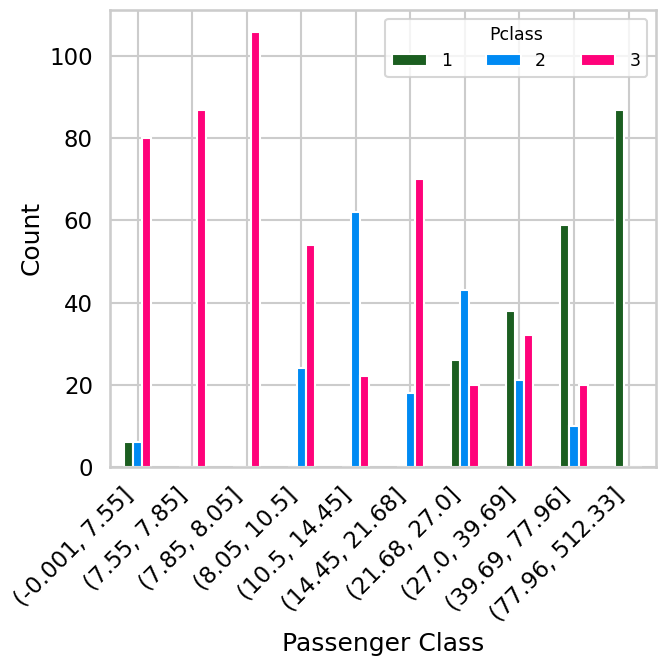

In [25]:
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the amount of people per class by fare (raw)
class_by_fare.plot(
    xlabel="Passenger Class",
    ylabel="Count",
    kind="bar",
    color=[COLOURS["green"], COLOURS["blue"], COLOURS["pink"]],
    ax=ax
)
# Rotate x-labels
plt.xticks(
    horizontalalignment="right",
    rotation=45
)
# Add a legend
plt.legend(title="Pclass", ncol=3, title_fontsize="x-small", fontsize="x-small")
# Save the plot as a PDF file
plt.tight_layout()
plt.savefig("figures/class-fare_raw.pdf", bbox_inches="tight")
plt.savefig("figures/class-fare_raw.pgf", bbox_inches="tight")

### Passenger Class by Fare (normalised)

In [26]:
# Calculate the per-class passenger amount by fare
class_by_fare = pd.crosstab(
    pd.qcut(df["Fare"].round(DEFAULT_PRECISION), quantiles),
    df["Pclass"],
    normalize="index"
)

# Format the index and column names for LaTeX output
styler = class_by_fare.style
styler.format_index("\\textbf{{{}}}", axis=0, escape="latex")
styler.format_index("\\textbf{{{}}}", axis=1, escape="latex")
styler.format(
    subset=None,
    formatter=lambda x: f"{100*x:.{DEFAULT_PRECISION}f}"+"\%"
)
# Generate LaTeX table and save it to a file
styler.to_latex("tables/class-fare_normalised.tex", hrules=True)

# Display the normalized class by fare dataframe
class_by_fare

Pclass,1,2,3
Fare,,,
"(-0.001, 7.55]",0.065217,0.065217,0.869565
"(7.55, 7.85]",0.000000,0.000000,1.000000
"(7.85, 8.05]",0.000000,0.000000,1.000000
"(8.05, 10.5]",0.000000,0.307692,0.692308
"(10.5, 14.45]",0.000000,0.738095,0.261905
"(14.45, 21.68]",0.000000,0.204545,0.795455
"(21.68, 27.0]",0.292135,0.483146,0.224719
"(27.0, 39.69]",0.417582,0.230769,0.351648
"(39.69, 77.96]",0.662921,0.112360,0.224719


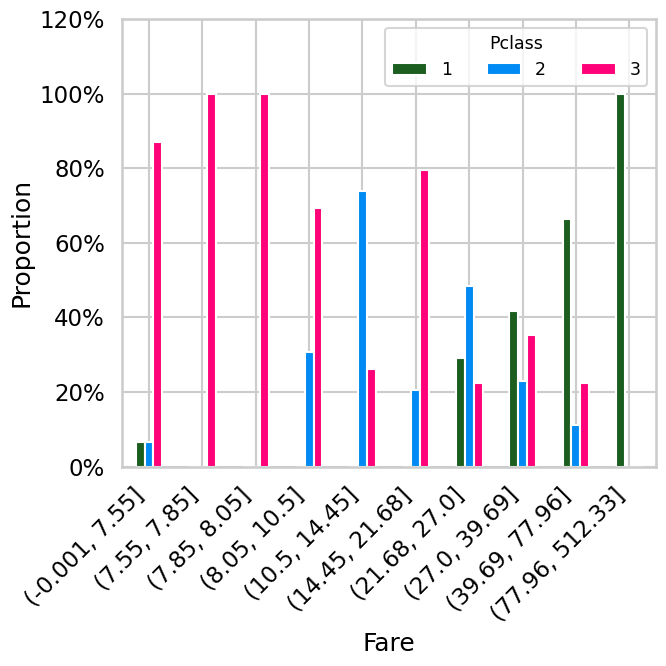

In [27]:
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the amount of people per class by fare (normalised)
class_by_fare.plot(
    xlabel="Fare",
    ylabel="Proportion",
    kind="bar",
    color=[COLOURS["green"], COLOURS["blue"], COLOURS["pink"]],
    ax=ax
)
# Rotate x-labels
plt.xticks(
    horizontalalignment="right",
    rotation=45
)
# Change y-labels to percentages
y_ticks = [f"{y:.0%}" for y in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_ticks)
# Add a legend
plt.legend(title="Pclass", ncol=3, title_fontsize="x-small", fontsize="x-small")
# Save the plot as a PDF file
plt.tight_layout()
plt.savefig("figures/class-fare_normalised.pdf", bbox_inches="tight")
plt.savefig("figures/class-fare_normalised.pgf", bbox_inches="tight")

## Survival Rate by Fare

### Histogram

In [28]:
bins = 20

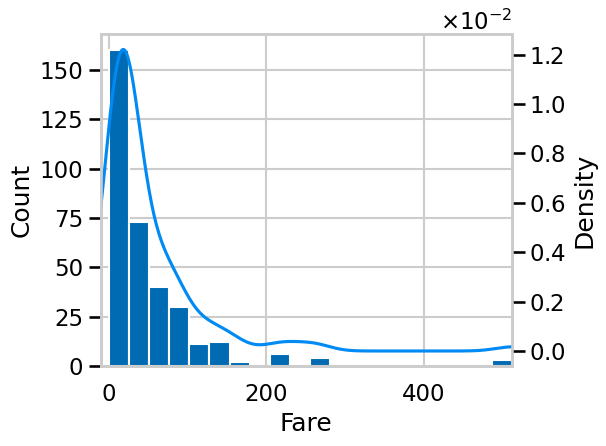

In [29]:
# Create a figure and axes
fig, ax = plt.subplots()

sns.histplot(
    df.query("Survived == True"),
    x="Fare",
    stat="count",
    bins=bins,
    color=COLOURS["mid_blue"],
    alpha=1,
    ax=ax
)
# Create a twin axes for the KDE plot
ax = ax.twinx()
# Set the y-axis format to scientific notation
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
# Plot the KDE (Kernel Density Estimation) of Fare for the surviving passengers
df.query("Survived == True").plot(
    kind="kde",
    xlim=(-10, df["Fare"].max()),
    y="Fare",
    ylabel="Count",
    color=COLOURS["blue"],
    legend=False,
    ax=ax
)
# Turn off the grid for the twin axes
ax.grid(False)

# Save the figure as a PDF file
plt.tight_layout()
plt.savefig("figures/survival-fare-hist_raw.pdf", bbox_inches="tight")
plt.savefig("figures/survival-fare-hist_raw.pgf", bbox_inches="tight")

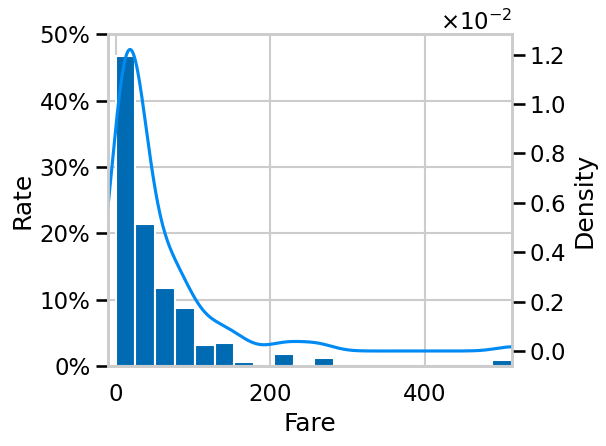

In [30]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Plot the histogram of Fare for the surviving passengers
sns.histplot(
    df.query("Survived == True"),
    x="Fare", 
    stat="probability",
    bins=bins,
    color=COLOURS["mid_blue"],
    alpha=1,
    ax=ax
)
# Set the y-label to "Rate"
ax.set_ylabel("Rate")
# Change y-labels to percentages
y_ticks = [f"{y:.0%}" for y in ax.get_yticks()]
ax.set_yticks(ax.get_yticks(), y_ticks)
# Create a twin axes for the KDE plot
ax = ax.twinx()
# Set the y-axis format to scientific notation
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
# Plot the KDE (Kernel Density Estimation) of Fare for the surviving passengers
df.query("Survived == True").plot(
    kind="kde",
    xlim=(-10, df["Fare"].max()),
    y="Fare",
    color=COLOURS["blue"],
    legend=False,
    ax=ax
)
# Turn off the grid for the twin axes
ax.grid(False)

# Save the figure as a PDF file
plt.tight_layout()
plt.savefig("figures/survival-fare-hist_normalised.pdf", bbox_inches="tight")
plt.savefig("figures/survival-fare-hist_normalised.pgf", bbox_inches="tight")

### Divided into 10-quantiles

#### Survival rate by fare (raw)

In [31]:
quantiles = 10

In [32]:
# Calculate the survival amount by fare
survival_rate_by_fare = pd.crosstab(
    pd.qcut(df["Fare"].round(DEFAULT_PRECISION), quantiles),
    df["Survived"]
)

# Format the index and column names for LaTeX output
styler = survival_rate_by_fare.style
styler.format_index("\\textbf{{{}}}", axis=0, escape="latex")
styler.format_index("\\textbf{{{}}}", axis=1, escape="latex")

# Generate LaTeX table and save it to a file
styler.to_latex("tables/survival-fare_raw.tex", hrules=True)

# Display the survival rate by fare dataframe
survival_rate_by_fare

Survived,False,True
Fare,,
"(-0.001, 7.55]",79,13
"(7.55, 7.85]",61,26
"(7.85, 8.05]",87,19
"(8.05, 10.5]",60,18
"(10.5, 14.45]",48,36
"(14.45, 21.68]",51,37
"(21.68, 27.0]",43,46
"(27.0, 39.69]",57,34
"(39.69, 77.96]",42,47


Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6


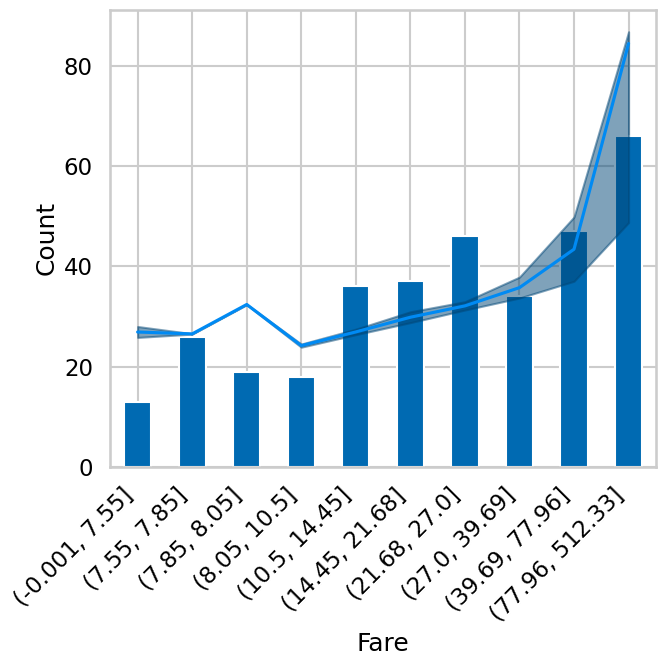

In [33]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the survival count by fare for the True category
survival_rate_by_fare[True].plot(
    xlabel="Fare",
    ylabel="Count",
    kind="bar",
    color=COLOURS["mid_blue"],
    ax=ax
)

# Calculating approximation
dfcopy = df.copy()
dfcopy["Survived"] = dfcopy["Survived"].astype(int)
model = logit(
    "Survived ~ Fare",
    dfcopy
).fit()
x = np.array([(iv.left, iv.mid, iv.right) for iv in survival_rate_by_fare.index], dtype=np.float64)
y = np.apply_along_axis(
    lambda x: model.predict(pd.DataFrame(x, columns=["Fare"])),
    1,
    x
) * survival_rate_by_fare.sum(1).values.reshape(-1, 1)

ax.plot(y[:, 1], color=COLOURS["blue"])
ax.fill_between(
    range(quantiles),
    y[:, 0],
    y[:, 2],
    color=COLOURS["dark_blue"],
    alpha=0.5
)
# Rotate x-labels
plt.xticks(
    horizontalalignment="right",
    rotation=45
)

# Save the figure as a PDF file
plt.tight_layout()
plt.savefig("figures/survival-fare_raw.pdf", bbox_inches="tight")
plt.savefig("figures/survival-fare_raw.pgf", bbox_inches="tight")

#### Survival rate by fare (normalised)

In [34]:
# Calculate the survival rate by fare
survival_rate_by_fare = pd.crosstab(
    pd.qcut(df["Fare"].round(DEFAULT_PRECISION),quantiles),
    df["Survived"],
    normalize="index"
)

# Format the index and column names for LaTeX output
styler = survival_rate_by_fare.style
styler.format_index("\\textbf{{{}}}", axis=0, escape="latex")
styler.format_index("\\textbf{{{}}}", axis=1, escape="latex")
styler.format(
    subset=None,
    formatter=lambda x: f"{100*x:.{DEFAULT_PRECISION}f}"+"\%"
)
# Generate LaTeX table and save it to a file
styler.to_latex("tables/survival-fare_normalised.tex", hrules=True)

# Display the normalized survival rate by fare dataframe
survival_rate_by_fare

Survived,False,True
Fare,,
"(-0.001, 7.55]",0.858696,0.141304
"(7.55, 7.85]",0.701149,0.298851
"(7.85, 8.05]",0.820755,0.179245
"(8.05, 10.5]",0.769231,0.230769
"(10.5, 14.45]",0.571429,0.428571
"(14.45, 21.68]",0.579545,0.420455
"(21.68, 27.0]",0.483146,0.516854
"(27.0, 39.69]",0.626374,0.373626
"(39.69, 77.96]",0.471910,0.528090


Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6


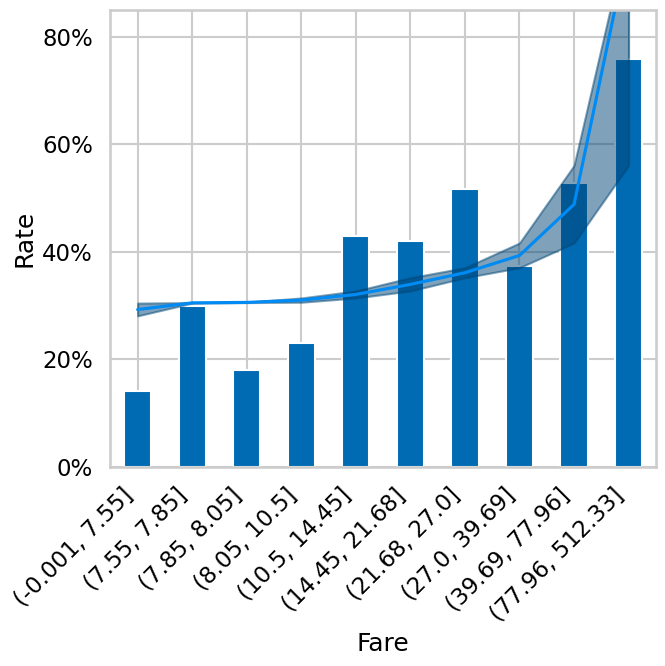

In [35]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the survival rate by fare for the True category
survival_rate_by_fare[True].plot(
    xlabel="Fare",
    ylabel="Rate",
    kind="bar",
    color=COLOURS["mid_blue"],
    ax=ax
)

# Calculating approximation
dfcopy = df.copy()
dfcopy["Survived"] = dfcopy["Survived"].astype(int)
model = logit(
    "Survived ~ Fare",
    dfcopy
).fit()
x = np.array([(iv.left, iv.mid, iv.right) for iv in survival_rate_by_fare.index], dtype=np.float64)
y = np.apply_along_axis(
    lambda x: model.predict(pd.DataFrame(x, columns=["Fare"])),
    1, 
    x
)

ax.plot(y[:, 1], color=COLOURS["blue"])
ax.fill_between(
    range(quantiles),
    y[:, 0],
    y[:, 2],
    color=COLOURS["dark_blue"],
    alpha=0.5
)

# Rotate x-labels
plt.xticks(
    horizontalalignment="right",
    rotation=45
)
# Change y-labels to percentages
y_ticks = [f"{y:.0%}" for y in ax.get_yticks()]
ax.set_yticks(ax.get_yticks(), y_ticks)
ax.set_ylim(0, 0.85)

# Save the figure as a PDF file
plt.tight_layout()
plt.savefig("figures/survival-fare_normalised.pdf", bbox_inches="tight")
plt.savefig("figures/survival-fare_normalised.pgf", bbox_inches="tight")